In [ ]:
pd.set_option('display.max_rows', None)

#Preparing Data

In [ ]:
#reading the Excel file. Change the PATH to match file PATH
xlsx_data = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/TASK1/INPUT.xlsx')

In [ ]:
#Needed sheets for this work
selected_sheet=['OutputData','AllVisit','DiagnosisData','MedicationData']

In [ ]:
# Read all needed sheets
sheet_to_df = {}
for sheet_index, sheet_name in enumerate(selected_sheet):
    sheet_to_df[sheet_name] = xlsx_data.parse(sheet_name)

In [ ]:
#Convert alphabetic index to numerical index
def convert_index(value):
  if type(value) is list:
    return [reduce(lambda x, y: x*26 + y, [ord(c.upper()) - ord('A') + 1 for c in col]) for col in value]
  else:
    return reduce( lambda x, y: x*26 + y, [ord(c.upper()) - ord('A') + 1 for c in value])

In [ ]:
#Selected Columns, The program add/remove columns dynamically from this list
selected_columns={
    'OutputData':['E','J','Q','T','U','W','X','DX',['OS','SV']],
    'AllVisit':['E','H','I','J','L','N','O','P','Q',['R','V'],'AA','AB',['AC','AF'],'AH',['CQ','EQ'],['LZ','MG'],['MT','MX'],['MY','NH']],
    'DiagnosisData':['D','E'],
    'MedicationData':['D','G','J','Q']
}

In [ ]:
sheet_df_selected_columns = {}

for df_key, df_column_list in selected_columns.items():

  sheet_df_selected_columns[df_key]=pd.DataFrame()
  for column_index in df_column_list:

    if type(column_index) is list:#if the item is list
      start_column_index, end_column_index=convert_index(column_index) #return [start, end] of numeric index
      current_sub_df=sheet_to_df[df_key].iloc[:,start_column_index-1:end_column_index]# selected intended columns
      sheet_df_selected_columns[df_key]=pd.concat([sheet_df_selected_columns[df_key], current_sub_df],axis=1) # combined current column with previous once
    else:# if it string item
      current_column_index=sheet_to_df[df_key].iloc[:,convert_index(column_index)-1]#select current column
      sheet_df_selected_columns[df_key][current_column_index.name]=current_column_index# combined current column with previous once

# Combine **OutputData** sheet with **AllVisit** sheet

In [ ]:
OutputData=sheet_df_selected_columns["OutputData"]
OutputData = OutputData.loc[(OutputData['PatientID'].notna()) & (OutputData['PatientID']>0),:]
display(len(OutputData),len(OutputData.columns),OutputData.head())

AllVisit=sheet_df_selected_columns["AllVisit"]
display(len(AllVisit),len(AllVisit.columns),AllVisit.head())

1080

116

,PatientID,Sex,Smoking(ever),IgM_Value(Highest),IgM(evaluation),aCCP_Value(Highest),aCCP(evaluation),First_Biologic(StartDate),COMORB_Cancer,COMORB_Cancer(StartDate),...,COMORB_PulmHypertens,COMORB_PulmHypertens(StartDate),COMORB_Sinusitis,COMORB_Sinusitis(StartDate),COMORB_SubglStenosis,COMORB_SubglStenosis(StartDate),COMORB_Bronchitis,COMORB_Bronchitis(StartDate),COMORB_HemorrhAlveol,COMORB_HemorrhAlveol(StartDate)
0,2,1,1.0,NaN,Negative,1.0,Negative,NaT,0.0,NaT,...,0.0,NaN,0.0,NaT,0.0,NaN,0.0,NaN,0.0,NaN
1,3,0,0.0,162.0,Positive,56.0,Positive,2023-10-27,0.0,NaT,...,0.0,NaN,0.0,NaT,0.0,NaN,0.0,NaN,0.0,NaN
2,4,0,NaN,NaN,NaN,NaN,NaN,2020-09-24,0.0,NaT,...,0.0,NaN,0.0,NaT,0.0,NaN,0.0,NaN,0.0,NaN
3,5,1,NaN,NaN,NaN,NaN,NaN,2021-01-12,0.0,NaT,...,0.0,NaN,0.0,NaT,0.0,NaN,0.0,NaN,0.0,NaN
4,6,1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


4057

97

,PatientID,AV_Visit_Date,AV_Age,AV_Work_status,AV_Smoking(now),AV_Years_of_education,AV_Height,AV_Weight,AV_BMI,AV_ESR,...,AV_WPAI_RA_Absenteeism,AV_WPAI_RA_Presenteeism,AV_WPAI_RA_WorkProductivityLoss,AV_WPAI_RA_ActivityImpairment,AV_WPAI_RA_Q1_PAID_EMPLOYMENT,AV_WPAI_RA_Q2_HOURS_MISSED_WORK_REASON_RA,AV_WPAI_RA_Q3_HOURS_MISSED_WORK_REASON_OTHER,AV_WPAI_RA_Q4_HOURS_WORKED,AV_WPAI_RA_Q5_RA_EFFECT_WORK,AV_WPAI_RA_Q6_RA_EFFECT_DAILY_ACTIVITIES
0,2,2021-07-07,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2021-07-08,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-09-10,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2022-07-19,52,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2020-02-03,43,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp_AllVisit=pd.merge(AllVisit,OutputData[["PatientID","First_Biologic(StartDate)"]], on="PatientID", how="left")
display(len(temp_AllVisit),len(temp_AllVisit.columns),temp_AllVisit.head())

4057

98

,PatientID,AV_Visit_Date,AV_Age,AV_Work_status,AV_Smoking(now),AV_Years_of_education,AV_Height,AV_Weight,AV_BMI,AV_ESR,...,AV_WPAI_RA_Presenteeism,AV_WPAI_RA_WorkProductivityLoss,AV_WPAI_RA_ActivityImpairment,AV_WPAI_RA_Q1_PAID_EMPLOYMENT,AV_WPAI_RA_Q2_HOURS_MISSED_WORK_REASON_RA,AV_WPAI_RA_Q3_HOURS_MISSED_WORK_REASON_OTHER,AV_WPAI_RA_Q4_HOURS_WORKED,AV_WPAI_RA_Q5_RA_EFFECT_WORK,AV_WPAI_RA_Q6_RA_EFFECT_DAILY_ACTIVITIES,First_Biologic(StartDate)
0,2,2021-07-07,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,2021-07-08,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2,2021-09-10,51,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2,2022-07-19,52,Full-time job,0.0,16.0,178.0,80.0,25.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,3,2020-02-03,43,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-27


In [ ]:
filter= (temp_AllVisit["First_Biologic(StartDate)"].isna()) | (temp_AllVisit["AV_Visit_Date"].isna()) | (temp_AllVisit["First_Biologic(StartDate)"]>temp_AllVisit["AV_Visit_Date"])
temp_AllVisit=temp_AllVisit.loc[filter,:].drop_duplicates(['PatientID'], keep='last')
temp_AllVisit.drop(columns=["First_Biologic(StartDate)"],axis=1,inplace=True)

In [ ]:
OutputData_Final=pd.merge(OutputData,temp_AllVisit, on="PatientID", how="left")

In [ ]:
OutputData_Final[OutputData_Final["PatientID"]==88]["AV_Visit_Date"]

85   2023-01-19
Name: AV_Visit_Date, dtype: datetime64[ns]

# Combine **OutputData** sheet with **DiagnosisData** sheet


In [ ]:
display(OutputData_Final.head())
display(sheet_df_selected_columns["DiagnosisData"].head())

,PatientID,Sex,Smoking(ever),IgM_Value(Highest),IgM(evaluation),aCCP_Value(Highest),aCCP(evaluation),First_Biologic(StartDate),COMORB_Cancer,COMORB_Cancer(StartDate),...,AV_WPAI_RA_Absenteeism,AV_WPAI_RA_Presenteeism,AV_WPAI_RA_WorkProductivityLoss,AV_WPAI_RA_ActivityImpairment,AV_WPAI_RA_Q1_PAID_EMPLOYMENT,AV_WPAI_RA_Q2_HOURS_MISSED_WORK_REASON_RA,AV_WPAI_RA_Q3_HOURS_MISSED_WORK_REASON_OTHER,AV_WPAI_RA_Q4_HOURS_WORKED,AV_WPAI_RA_Q5_RA_EFFECT_WORK,AV_WPAI_RA_Q6_RA_EFFECT_DAILY_ACTIVITIES
0,2,1,1.0,NaN,Negative,1.0,Negative,NaT,0.0,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,0.0,162.0,Positive,56.0,Positive,2023-10-27,0.0,NaT,...,0.0,20.0,20.0,30.0,1.0,0.0,0.0,48.0,2.0,3.0
2,4,0,NaN,NaN,NaN,NaN,NaN,2020-09-24,0.0,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,NaN,NaN,NaN,NaN,NaN,2021-01-12,0.0,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,PatientID,DiagnosisName
0,2,Rheumatoid Arthritis
1,3,Rheumatoid Arthritis
2,4,Ankylosing Spondylitis
3,5,Ankylosing Spondylitis
4,5,Joint disorder


In [ ]:
#only extract Rheumatoid Arthritis
convert_DiagnosisData=sheet_df_selected_columns["DiagnosisData"].loc[(sheet_df_selected_columns["DiagnosisData"]["DiagnosisName"]=="Rheumatoid Arthritis"),:]
#re-structuring the df
convert_DiagnosisData=convert_DiagnosisData.groupby("PatientID").count().reset_index()
convert_DiagnosisData.columns=["PatientID","hasRheumatoidArthritis"]

In [ ]:
#users with two Rheumatoid Arthritis
convert_DiagnosisData[convert_DiagnosisData["hasRheumatoidArthritis"]==2]

,PatientID,hasRheumatoidArthritis
2,7,2
251,527,2
289,603,2
304,632,2
375,764,2
445,949,2


In [ ]:
#users with three Rheumatoid Arthritis
convert_DiagnosisData[convert_DiagnosisData["hasRheumatoidArthritis"]==3]

,PatientID,hasRheumatoidArthritis
280,590,3


In [ ]:
convert_DiagnosisData.loc[convert_DiagnosisData["hasRheumatoidArthritis"]>1, 'hasRheumatoidArthritis'] = 1

In [ ]:
#meging the sheets
OutputData_Final=pd.merge(OutputData_Final, convert_DiagnosisData, on="PatientID", how="left")
#fill NaN values
OutputData_Final["hasRheumatoidArthritis"].fillna(0, inplace = True)

In [ ]:
# The statistic of new column
OutputData_Final["hasRheumatoidArthritis"].value_counts()

0.0    568
1.0    512
Name: hasRheumatoidArthritis, dtype: int64

# Combine **OutputData** sheet with **MedicationData** sheet

In [ ]:
# Show data
MedicationData=sheet_df_selected_columns["MedicationData"]
display(len(MedicationData),MedicationData["MedicamentGroupName"].unique(),MedicationData.head())

3494

array(['BIOLOGICS', 'OTHER/SUPPLEMENTS', 'DMARD', 'NSAID/COXIB'],
      dtype=object)

,PatientID,MedicamentGroupName,StartDate,EndDate
0,3,BIOLOGICS,2023-10-27,NaT
1,3,OTHER/SUPPLEMENTS,2020-06-15,2022-03-18
2,3,OTHER/SUPPLEMENTS,2022-05-20,2023-04-26
3,3,DMARD,2020-06-15,2020-10-05
4,3,DMARD,2023-03-22,2023-04-26


In [ ]:
# this function BIOLOGICS Medicament, and only return other Medicament that had been used before using BIOLOGICS Medicament
def medication_data_filtering(rows):
  #Find  the date for [BIOLOGICS]
  biologic_start_date=rows[rows["MedicamentGroupName"]=="BIOLOGICS"]["StartDate"].min()

  filtering= (rows["MedicamentGroupName"]!="BIOLOGICS") # remove BIOLOGICS rows

  if biologic_start_date is not pd.NaT:
    filtering=filtering & (rows["StartDate"]<biologic_start_date) # reomve sample after BIOLOGICS

  df_row=rows.loc[filtering,["MedicamentGroupName","StartDate","EndDate"]]

  df_row["StopDate"]= (biologic_start_date - df_row["EndDate"]).dt.days
  return df_row

In [ ]:
# group samples based on [PatientID]
MedicationData=MedicationData.groupby("PatientID").apply(lambda rows: medication_data_filtering(rows)).reset_index()

#drop not needed column
MedicationData.drop(columns=["level_1"],axis=1,inplace=True)
#sort samples
MedicationData.sort_values(by=["PatientID","MedicamentGroupName","StartDate"],inplace=True)

#Create new columns
MedicationData["period"]=(MedicationData["EndDate"]-MedicationData["StartDate"]).dt.days
MedicationData["isActive"]=MedicationData["EndDate"].isna()

In [ ]:
MedicationData.head(20)

,PatientID,MedicamentGroupName,StartDate,EndDate,StopDate,period,isActive
4,3,DMARD,2020-04-02,2023-06-15,134.0,1169.0,False
2,3,DMARD,2020-06-15,2020-10-05,1117.0,112.0,False
3,3,DMARD,2023-03-22,2023-04-26,184.0,35.0,False
7,3,DMARD,2023-04-26,2023-04-28,182.0,2.0,False
5,3,DMARD,2023-10-15,NaT,NaN,NaN,True
6,3,NSAID/COXIB,2020-07-13,2022-03-18,588.0,613.0,False
0,3,OTHER/SUPPLEMENTS,2020-06-15,2022-03-18,588.0,641.0,False
1,3,OTHER/SUPPLEMENTS,2022-05-20,2023-04-26,184.0,341.0,False
8,4,NSAID/COXIB,2019-09-14,2020-08-17,38.0,338.0,False
9,4,NSAID/COXIB,2020-08-17,2020-11-01,-38.0,76.0,False


In [ ]:
MedicationData=MedicationData.groupby(by=["PatientID","MedicamentGroupName"]).agg({
    'MedicamentGroupName' : ['count'],
    'period' : ['sum'],                           # sums all sessions period
    'StopDate' : ['min'],                           # min meaning the stoping for latest session
    'isActive' : lambda value: True in set(value) # check if any sessions are still active
}).reset_index()

MedicationData.columns=["PatientID","MedicamentGroupName","Multi","Period","StopDate","isActive"]
# if it has a treatment only once and still on going then convert it to -1
MedicationData.loc[(MedicationData["Period"]==0) & (MedicationData["isActive"]==True) & (MedicationData["Multi"]==1),["Period"]]=-1

In [ ]:
MedicationData=pd.pivot_table(
    MedicationData,
    columns=['MedicamentGroupName'],
    values=["Multi","Period",'StopDate',"isActive"],
    index=['PatientID'],
    #fill_value=0
)
#swapping multi index coming from group by
MedicationData.columns = MedicationData.columns.swaplevel(0, 1)
#sorting index
MedicationData.sort_index(axis=1, level=0, inplace=True)
#changing style
MedicationData.columns = MedicationData.columns.to_flat_index().map(lambda x: x[0]+str("_"+x[1]))
MedicationData.reset_index(inplace=True)

In [ ]:
MedicationData.head()

,PatientID,DMARD_Multi,DMARD_Period,DMARD_StopDate,DMARD_isActive,NSAID/COXIB_Multi,NSAID/COXIB_Period,NSAID/COXIB_StopDate,NSAID/COXIB_isActive,OTHER/SUPPLEMENTS_Multi,OTHER/SUPPLEMENTS_Period,OTHER/SUPPLEMENTS_StopDate,OTHER/SUPPLEMENTS_isActive
0,3,5.0,1318.0,134.0,1.0,1.0,613.0,588.0,0.0,2.0,982.0,184.0,0.0
1,4,NaN,NaN,NaN,NaN,2.0,414.0,-38.0,0.0,NaN,NaN,NaN,NaN
2,6,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,1.0,NaN,NaN,NaN,NaN
3,11,4.0,679.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,3.0,166.0,1148.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(len(MedicationData))
print(MedicationData["PatientID"].nunique())

698
698


In [ ]:
#meging the sheets
OutputData_Final=pd.merge(OutputData_Final, MedicationData, on="PatientID", how="left")
OutputData_Final[MedicationData.columns.difference(['PatientID'])]=OutputData_Final[MedicationData.columns.difference(['PatientID'])].fillna(0)

In [ ]:
display(OutputData_Final[OutputData_Final["PatientID"]==4]["AV_Visit_Date"])
# display(OutputData_Final[OutputData_Final["PatientID"]==11]["AV_Visit_Date"])

2   2020-08-17
Name: AV_Visit_Date, dtype: datetime64[ns]

In [ ]:
OutputData_Final[OutputData_Final["PatientID"]==4]["AV_Visit_Date"]

2   2020-08-17
Name: AV_Visit_Date, dtype: datetime64[ns]

#Saving Output in File

In [ ]:
#saving the output
OutputData_Final.to_csv('/content/drive/MyDrive/Colab Notebooks/TASK1/OUTPUT.csv', index=False)

#Questions

### Could you, please, write to me how many patients with rheumathoid arthritic do we have in total.

In [ ]:
# They don't have value_counts==0
# They have value_counts==1

OutputData_Final["hasRheumatoidArthritis"].value_counts()

0.0    568
1.0    512
Name: hasRheumatoidArthritis, dtype: int64

### how many with biological treatment among them

In [ ]:
df_q2=OutputData_Final.loc[(OutputData_Final["hasRheumatoidArthritis"]==1) & (OutputData_Final["First_Biologic(StartDate)"].notnull()),:]

print(f'Number of heumathoid arthritic patients who have biological treatment {len(df_q2)}')


df_q2[["PatientID","hasRheumatoidArthritis","First_Biologic(StartDate)"]].head()

Number of heumathoid arthritic patients who have biological treatment 215


,PatientID,hasRheumatoidArthritis,First_Biologic(StartDate)
1,3,1.0,2023-10-27
5,7,1.0,2019-10-24
10,12,1.0,2021-01-14
11,13,1.0,2018-03-13
23,26,1.0,2020-11-02


### Could you, please, summarize how big is the problem of missing data?

In [ ]:
print(f'Dataset Shape {OutputData_Final.shape}')

Dataset Shape (1080, 225)


#### For each column

In [ ]:
OutputData_Final.isnull().sum(axis = 0).head()

PatientID               0
Sex                     0
Smoking(ever)         132
IgM_Value(Highest)    460
IgM(evaluation)       420
dtype: int64

#### For each row

In [ ]:
OutputData_Final.isnull().sum(axis = 1)

# Analyzing missing data for rheumatoid arthritis patients

In [ ]:
RheumatoidArthritis_DF=OutputData_Final.loc[(OutputData_Final["hasRheumatoidArthritis"]==1),:]

In [ ]:
print(RheumatoidArthritis_DF.shape)
RheumatoidArthritis_DF.head()

(512, 225)


,PatientID,Sex,Smoking(ever),IgM_Value(Highest),IgM(evaluation),aCCP_Value(Highest),aCCP(evaluation),First_Biologic(StartDate),COMORB_Cancer,COMORB_Cancer(StartDate),...,DMARD_StopDate,DMARD_isActive,NSAID/COXIB_Multi,NSAID/COXIB_Period,NSAID/COXIB_StopDate,NSAID/COXIB_isActive,OTHER/SUPPLEMENTS_Multi,OTHER/SUPPLEMENTS_Period,OTHER/SUPPLEMENTS_StopDate,OTHER/SUPPLEMENTS_isActive
0,2,1,1.0,NaN,Negative,1.0,Negative,NaT,0.0,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0.0,162.0,Positive,56.0,Positive,2023-10-27,0.0,NaT,...,134.0,1.0,1.0,613.0,588.0,0.0,2.0,982.0,184.0,0.0
5,7,1,0.0,46.0,Positive,7.0,Negative,2019-10-24,0.0,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12,0,0.0,231.0,Positive,500.0,Positive,2021-01-14,0.0,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,13,0,NaN,156.0,Positive,205.0,NaN,2018-03-13,0.0,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Count_null_percentage=OutputData_Final.isnull().sum(axis = 0).apply(lambda x: round(x/len(OutputData_Final)*100))
print(np.sum(Count_null_percentage==0))
print(np.sum(Count_null_percentage==100))

15
35


In [ ]:
grouping_columns=pd.cut(Count_null_percentage, [-1,0, 10,25, 50, 75,90,99 ,100])
bar_chart_data=grouping_columns.groupby(grouping_columns).count()

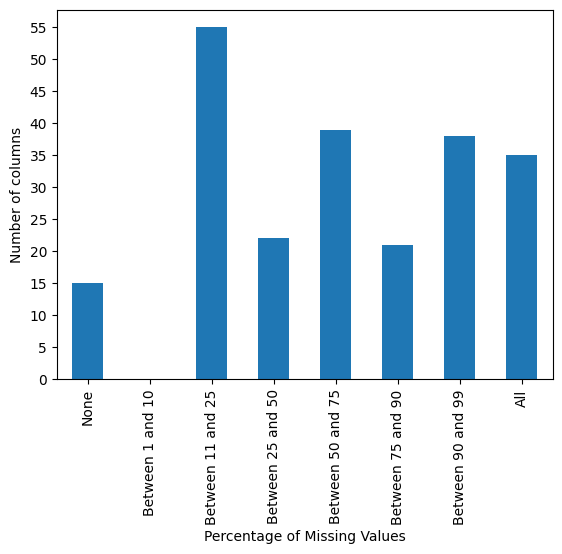

In [ ]:
import matplotlib.pyplot as plt

bar_chart_data.plot.bar()

plt.xticks(ticks=np.arange(8), labels=["None","Between 1 and 10","Between 11 and 25","Between 25 and 50","Between 50 and 75","Between 75 and 90","Between 90 and 99","All"])
plt.yticks(np.arange(bar_chart_data.min(), bar_chart_data.max()+5, 5))

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of columns')

plt.show()

In [ ]:
bar_chart_data

(-1, 0]      15
(0, 10]       0
(10, 25]     55
(25, 50]     22
(50, 75]     39
(75, 90]     21
(90, 99]     38
(99, 100]    35
dtype: int64